In [1]:
import pandas as pd
import numpy as np
from os import path
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt

MOVE THE VARIABLES TO A CONFIG FILE

In [2]:
DATA_DIR = './data'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
TRAIN_PROC_FILE = 'train_processed.csv'
TEST_PROC_FILE = 'test_processed.csv'
LINEAR_REG_PRED_FILE = 'linear_regression.csv'
LOG_REG_PRED_FILE = 'log_regression.csv'

MODEL_DIR = './models'
SEX_ENC_PKL = 'sex_enc_map.pkl'
TITLE_ENC_PKL = 'title_enc_map.pkl'
EMBARKED_ENC_PKL = 'embarked_enc_map.pkl'

In [3]:
train_df = pd.read_csv(path.join(DATA_DIR, TRAIN_PROC_FILE))
test_df = pd.read_csv(path.join(DATA_DIR, TEST_PROC_FILE))


op_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
op_df['PassengerId'] = test_df['PassengerId']

In [4]:
y = train_df['Survived']
X = train_df.drop(columns=['Survived'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=20)

----
#### Decision Tree

Feature importance plot



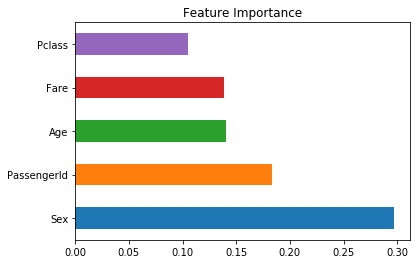

Cross validated scores: [0.79487179 0.76068376 0.75652174 0.73043478 0.76521739]
Cross Predicted Accuracy: -0.19814610461266824
Confusion Matrix: 
 [[156  41]
 [ 46  69]]


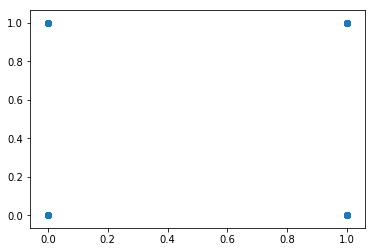

In [5]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(dec_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(dec_tree, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(dec_tree, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)

Feature importance plot



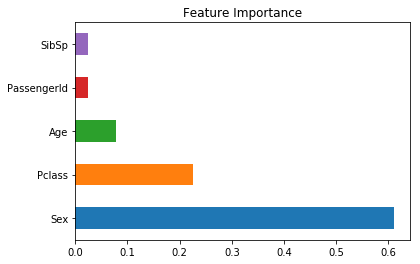

Cross validated scores: [0.83760684 0.81196581 0.8        0.82608696 0.77391304]
Cross Predicted Accuracy: 0.02220260428161558
Confusion Matrix: 
 [[165  32]
 [ 39  76]]


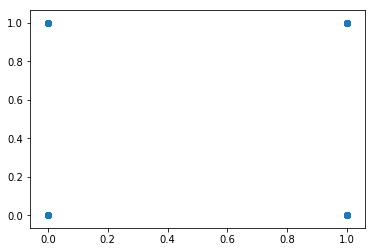

In [8]:
extra_tree = ExtraTreeClassifier(max_depth=4, max_features=5)
extra_tree.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(extra_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(extra_tree, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(extra_tree, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)

Feature importance plot



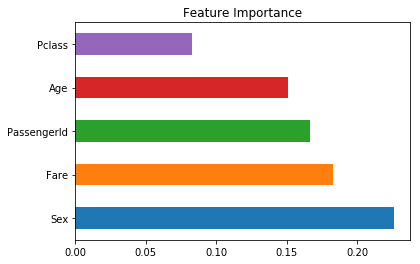

Cross validated scores: [0.79487179 0.82905983 0.86086957 0.83478261 0.82608696]
Cross Predicted Accuracy: 0.10483337011697202
Confusion Matrix: 
 [[172  25]
 [ 40  75]]


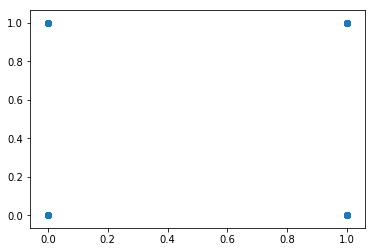

In [7]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(rfc, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(rfc, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)